In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-global-ai-ml-data-science-salary-for-2025/salaries.csv


## Title: Global AI & Data Science Salaries 2025

#### Description: A comprehensive analysis of AI, ML, and Data Science salaries worldwide in 2025, covering trends, experience levels, job roles, and regional comparisons.

## Import dataset

In [2]:
df = pd.read_csv('/kaggle/input/the-global-ai-ml-data-science-salary-for-2025/salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


In [4]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
88579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
88583,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.duplicated().sum()

44340

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

## Data visulizations

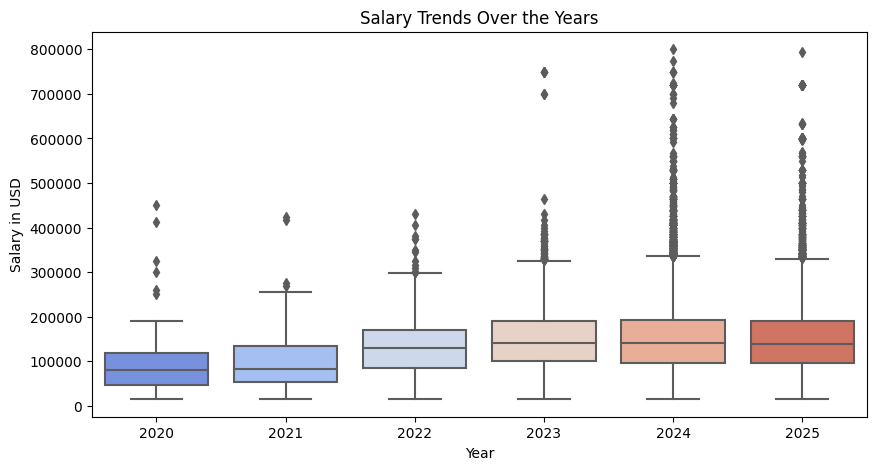

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='work_year', y='salary_in_usd', data=df, palette="coolwarm")
plt.title("Salary Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Salary in USD")
plt.show()

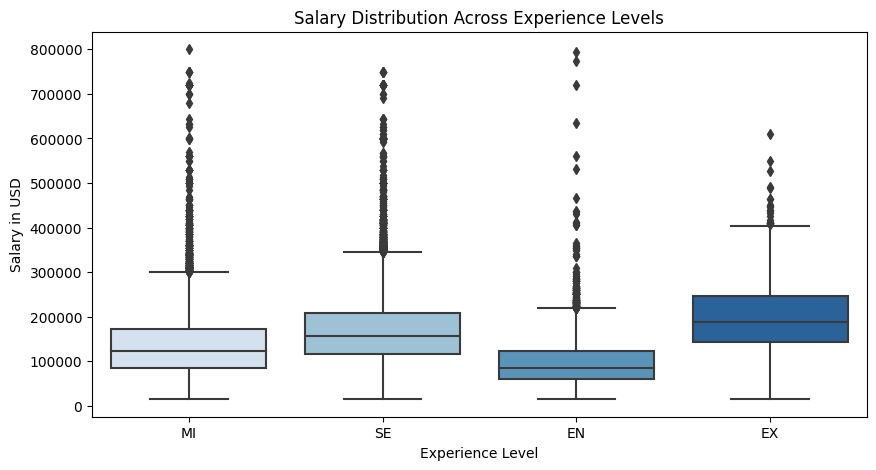

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette="Blues")
plt.title("Salary Distribution Across Experience Levels")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.show()

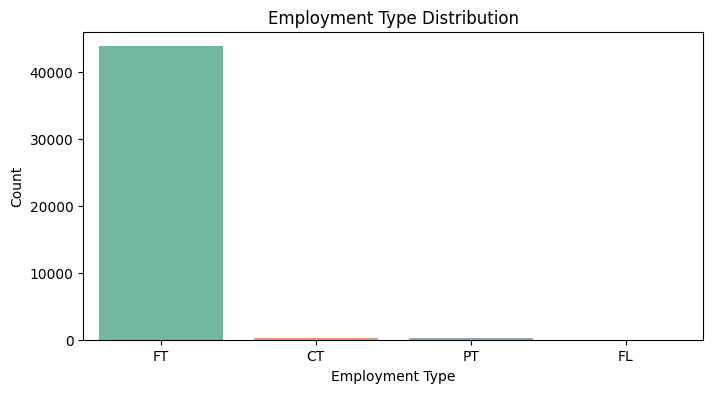

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(x='employment_type', data=df, palette="Set2")
plt.title("Employment Type Distribution")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.show()

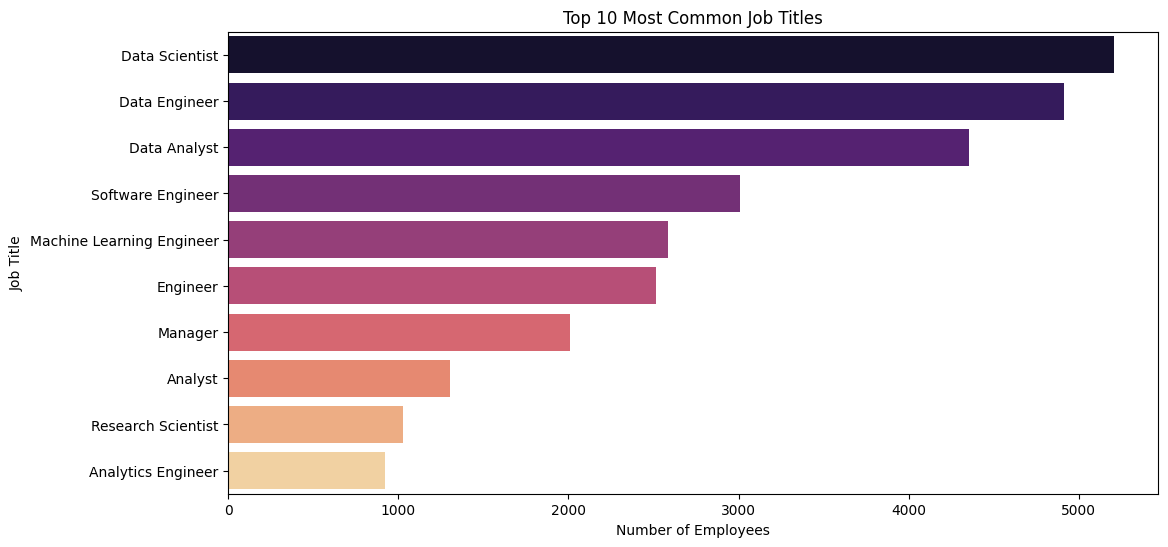

In [14]:
plt.figure(figsize=(12, 6))
top_jobs = df['job_title'].value_counts().nlargest(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="magma")
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Number of Employees")
plt.ylabel("Job Title")
plt.show()

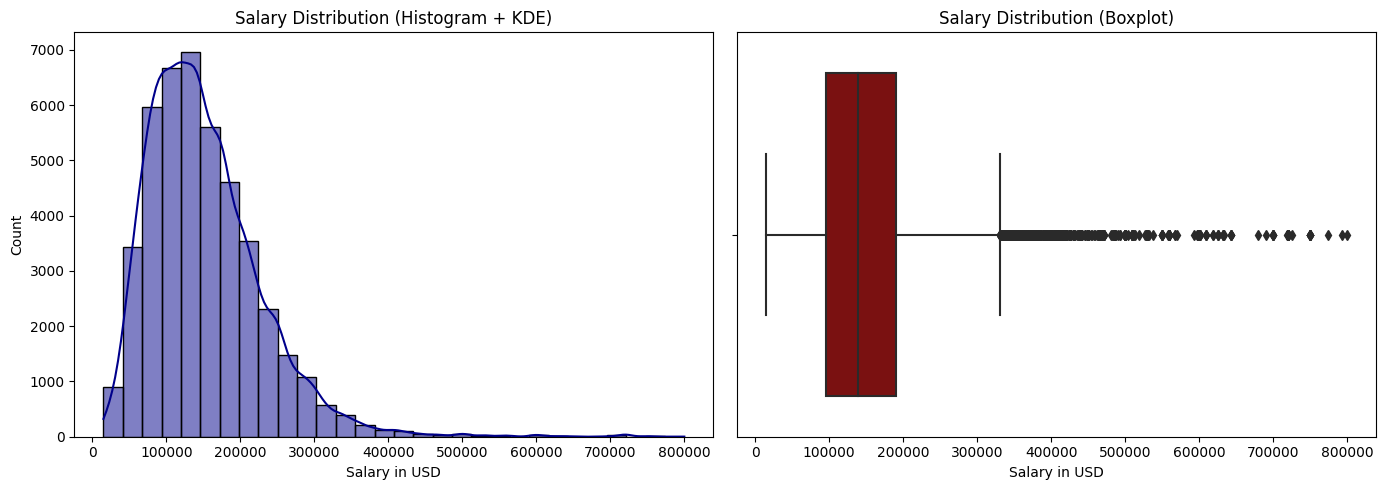

In [15]:
# 5. Salary Distribution (KDE and Boxplot)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['salary_in_usd'], kde=True, bins=30, ax=ax[0], color='darkblue')
ax[0].set_title("Salary Distribution (Histogram + KDE)")
ax[0].set_xlabel("Salary in USD")

sns.boxplot(x=df['salary_in_usd'], ax=ax[1], color='darkred')
ax[1].set_title("Salary Distribution (Boxplot)")
ax[1].set_xlabel("Salary in USD")

plt.tight_layout()
plt.show()

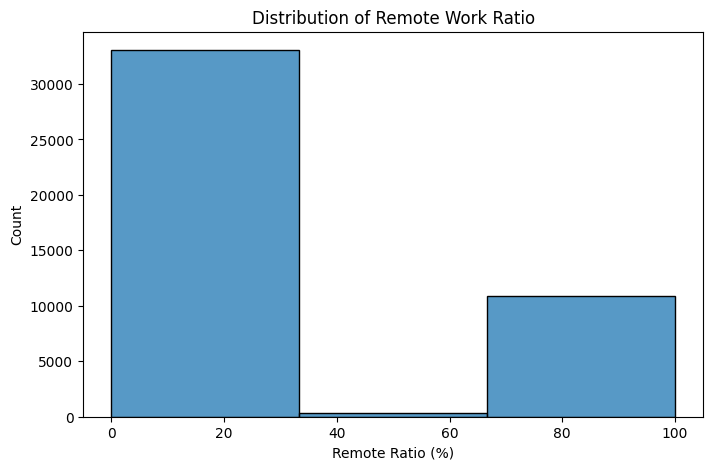

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['remote_ratio'], bins=3, kde=False, palette="viridis")
plt.title("Distribution of Remote Work Ratio")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Count")
plt.show()

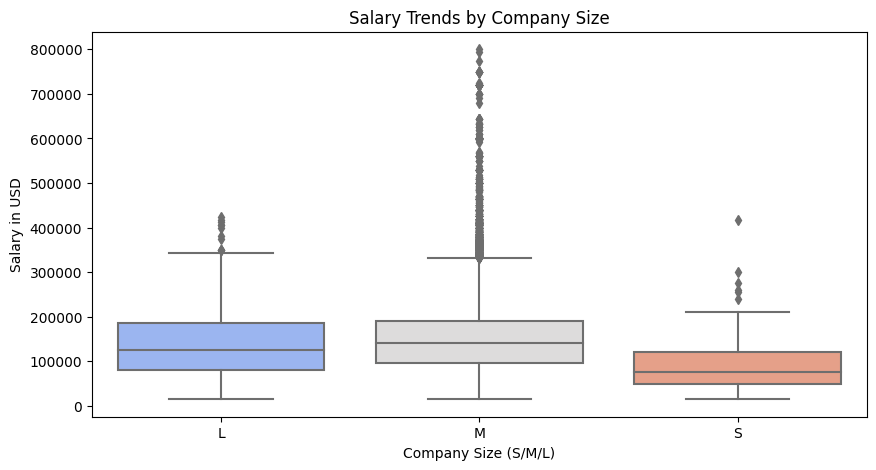

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='company_size', y='salary_in_usd', data=df, palette="coolwarm")
plt.title("Salary Trends by Company Size")
plt.xlabel("Company Size (S/M/L)")
plt.ylabel("Salary in USD")
plt.show()

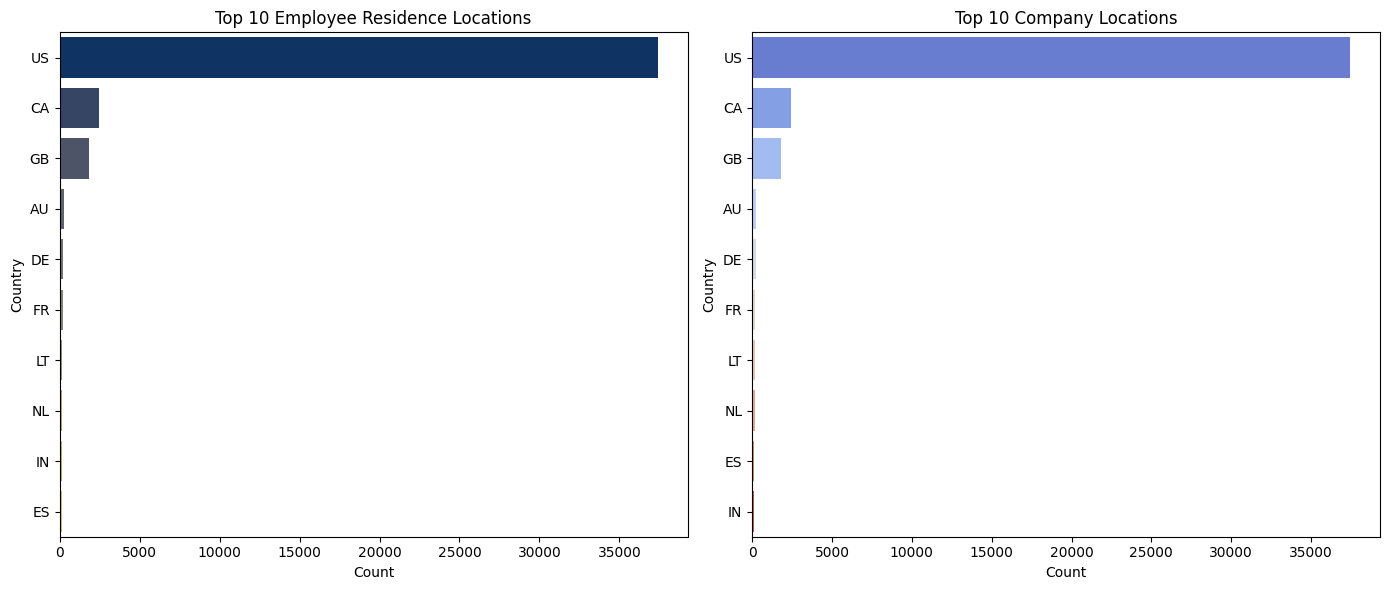

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

top_countries = df['employee_residence'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index, ax=ax[0], palette="cividis")
ax[0].set_title("Top 10 Employee Residence Locations")
ax[0].set_xlabel("Count")
ax[0].set_ylabel("Country")

top_locations = df['company_location'].value_counts().nlargest(10)
sns.barplot(x=top_locations.values, y=top_locations.index, ax=ax[1], palette="coolwarm")
ax[1].set_title("Top 10 Company Locations")
ax[1].set_xlabel("Count")
ax[1].set_ylabel("Country")

plt.tight_layout()
plt.show()

## predictive modeling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
df.dropna(inplace=True)

In [21]:
# Encoding categorical columns
categorical_cols = ['experience_level', 'employment_type', 'job_title', 
                    'salary_currency', 'employee_residence', 'company_location', 'company_size']


In [22]:
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


In [23]:
# Define Features (X) and Target (y)
X = df.drop(columns=['salary_in_usd'])  # Features
y = df['salary_in_usd']  

In [24]:
# Normalize the target variable (Optional but improves performance for some models)
scaler = StandardScaler()
y = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

In [25]:
 #Train-Test Split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

In [27]:
# Train models and evaluate performance
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Calculate accuracy metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) * 100  # Convert to percentage

    results[name] = round(r2, 2)  # Store R² as percentage

# Print results
print("\nModel Performance (R² Score in %):")
for model, score in results.items():
    print(f"{model}: {score}%")


Model Performance (R² Score in %):
Linear Regression: 21.1%
Random Forest: 97.81%
Gradient Boosting: 99.17%
Support Vector Regressor: 93.44%
K-Nearest Neighbors: 96.28%


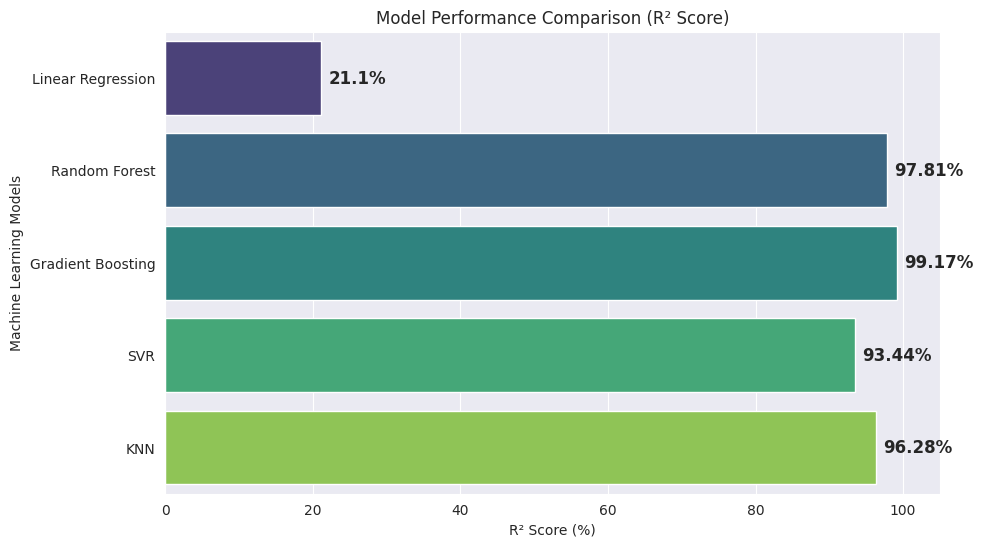

In [28]:
# Model performance data
model_names = ["Linear Regression", "Random Forest", "Gradient Boosting", "SVR", "KNN"]
r2_scores = [21.1, 97.81, 99.17, 93.44, 96.28]

# Set plot style
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

# Create barplot
sns.barplot(x=r2_scores, y=model_names, palette="viridis")

# Add titles and labels
plt.xlabel("R² Score (%)")
plt.ylabel("Machine Learning Models")
plt.title("Model Performance Comparison (R² Score)")

# Show values on bars
for index, value in enumerate(r2_scores):
    plt.text(value + 1, index, f"{value}%", va='center', fontsize=12, fontweight='bold')

# Show plot
plt.xlim(0, 105)  # Adjust x-axis limit for better readability
plt.show()

## Thank you!!!..pls upvote!!!!